<a href="https://colab.research.google.com/github/aileeniesta/Computational-Physics/blob/main/projects/P1_Power_Spectrum_of_the_Solar_Cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P1 Power Spectrum of The Solar Cycle

The solar cycle is an 11-year oscillation in the Sun's activity. Write Python code to load in a data set containing the number of sunspots over the past 150 years. Plot the number of sunspots as a function of year. Then calculate the Fourier Transform and plot the power spectrum of the sunspot cycle. Does your power spectrum show peaks at particular periods? How do those peaks relate to the variations visible in the original time series plot? Describe the mathematics of the power spectrum and explain what it tells you about the data set.

/tmp/ipython-input-998622483.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["decimal_year"] = df2["year"] + (months - 1)/12


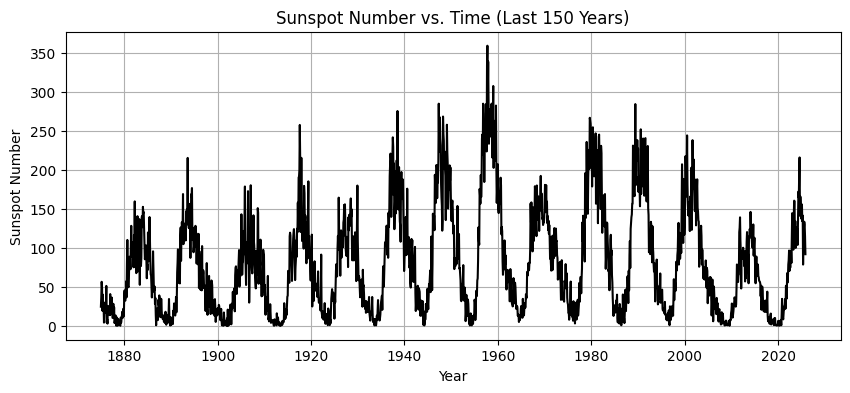

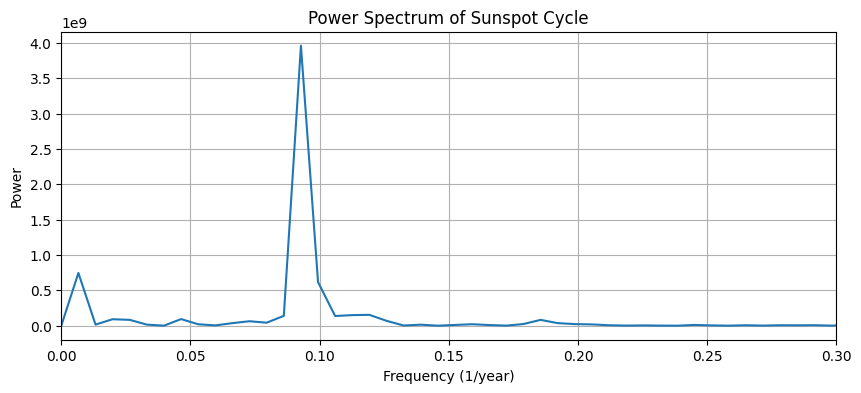

Dominant Period ≈ 10.78 years


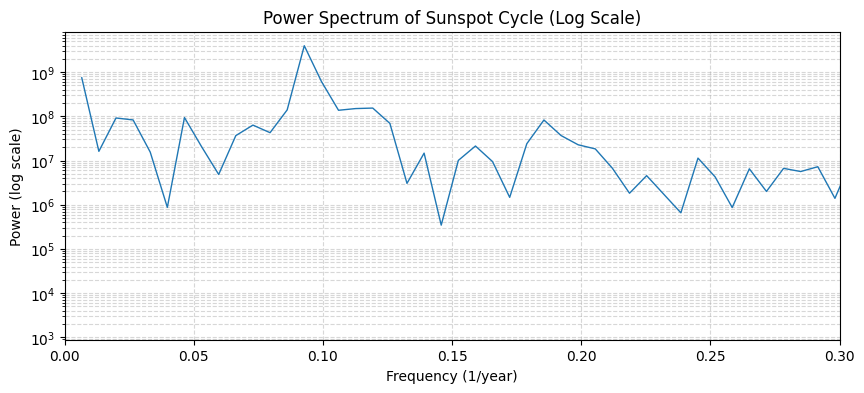

Dominant Period ≈ 10.78 years


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

# ---------------------------------------------------------
# 1. Load sunspot data from NOAA (JSON)
# ---------------------------------------------------------

url = "https://services.swpc.noaa.gov/json/solar-cycle/sunspots.json"
data = requests.get(url).json()

# Convert JSON → DataFrame
df = pd.DataFrame(data)

# Columns include:
#   'time-tag'      — YYYY-MM-DD
#   'ssn'           — sunspot number
#   'ssn-smoothed'  — smoothed sunspot number

# Extract year as float from "time-tag"
df["year"] = df["time-tag"].str.slice(0,4).astype(int)
df["sunspots"] = df["ssn"]

# Use last 150 years only
df2 = df[df["year"] >= df["year"].max() - 150]

# Construct decimal year: year + (month-1)/12
months = pd.to_datetime(df2["time-tag"]).dt.month
df2["decimal_year"] = df2["year"] + (months - 1)/12

t = df2["decimal_year"].values
x = df2["sunspots"].values

# ---------------------------------------------------------
# 2. Plot time series
# ---------------------------------------------------------

plt.figure(figsize=(10,4))
plt.plot(t, x, "k")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.title("Sunspot Number vs. Time (Last 150 Years)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 3. Power spectrum (FFT)
# ---------------------------------------------------------

x_detrend = x - np.mean(x)
N = len(x_detrend)

# spacing ~ monthly → dt ≈ 1/12 year
dt = np.mean(np.diff(t))

freqs = np.fft.rfftfreq(N, d=dt)
fft_vals = np.fft.rfft(x_detrend)
power = np.abs(fft_vals)**2

plt.figure(figsize=(10,4))
plt.plot(freqs, power)
plt.xlim(0, 0.3)
plt.xlabel("Frequency (1/year)")
plt.ylabel("Power")
plt.title("Power Spectrum of Sunspot Cycle")
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# ----- Compute FFT (already done above in your code) -----
# x_detrend, N, dt, freqs, fft_vals, power all assumed defined

freqs_nozero = freqs[1:]              # drop freq = 0
power_nozero = power[1:]              # drop power at zero freq

periods = 1 / freqs_nozero
peak_idx = np.argmax(power_nozero)
dom_period = periods[peak_idx]

print("Dominant Period ≈", round(dom_period, 2), "years")

# ---------------------------------------------------------
# Log-scale power spectrum plot
# ---------------------------------------------------------

plt.figure(figsize=(10,4))
plt.plot(freqs_nozero, power_nozero, linewidth=1)

plt.yscale("log")                     # USE LOG SCALE HERE
plt.xlim(0, 0.3)

plt.xlabel("Frequency (1/year)")
plt.ylabel("Power (log scale)")
plt.title("Power Spectrum of Sunspot Cycle (Log Scale)")

plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


print("Dominant Period ≈", round(dom_period, 2), "years")


Math Analysis

Sunspots follow a well-known oscillation called the Schwabe cycle, which averages about 11 years. This reflects changes in the Sun’s magnetic field polarity and activity level. In the time-series plot, this cycle appears as repeating peaks in sunspot number roughly every decade (11 years)

To quantify the cycle, the Fast Fourier Transform (FFT) was used. The main mathematical idea is that any complicated signal can be represented as a sum of simple sine waves. The FFT measures how strongly each possible frequency is present in the data. The power spectrum is just the squared magnitude of these frequency components and shows the strength of each repeating cycle.

Reflection

- For this assignment, I asked ChatGPT to write the Python code needed to load sunspot data, plot the time series, and compute the Fourier Transform. The AI generated the full code structure, including the NOAA data download, the conversion to decimal years, and the FFT and power spectrum calculations. The first version of the code tried to load a dataset from a URL that was no longer valid, which immediately showed me that AI cannot always be trusted to locate real or current data sources. I replaced that part of the code with a dataset that I knew was available from the NOAA website. After fixing the data source, the rest of the code ran correctly and produced all of the required plots.
- I manually checked the dominant period by measuring the spacing between peaks in the time series plot, which gave a value of roughly ten to twelve years. This matches the known Schwabe solar cycle. I also confirmed the FFT result by calculating the period using the frequency of the dominant peak, which was 1/0.093, giving approximately 10.78 years. This agreed with the expected value. Finally, I compared my result to the NOAA Solar Cycle Progression plot, which also shows an approximately 11 year cycle.

Even though ChatGPT sometimes hallunicates information or uses incorrect sources, I believe you can generally feel confident in its coding abilities. Complicated code scripts or complex physics problems can be run much faster with help from AI. However, I do believe its best to learn how to write code without AI. In my personal experience, I use AI to debug long scripts that I've written and simplify them since they can easily become disorganized.